In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
#url = 'Resources/fma_3secs.csv'
orignial_df = pd.read_csv(Path('Resources/model_data_3sec.csv'))
orignial_df

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [3]:
orignial_df_subset = orignial_df[(orignial_df.label == 'Electronic') | (orignial_df.label == 'Experimental')]
orignial_df_subset

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
28,31,2-000995.mp3,0.685851,0.033443,0.385512,0.000152,2808.883704,23154.953563,2470.737420,1494.536820,...,10.653401,-6.331983,10.903942,-0.412861,9.537299,-6.327381,11.391726,-1.126299,11.927361,Experimental
29,32,3-000995.mp3,0.703042,0.030243,0.387063,0.000109,2830.777260,9239.652104,2477.625978,1146.387585,...,10.627180,-6.803316,10.563195,-0.997821,11.816387,-6.196778,6.830270,-0.787392,9.634679,Experimental
30,33,4-000995.mp3,0.695713,0.034511,0.389012,0.000255,2758.032133,14266.837756,2456.067679,1449.193777,...,9.044753,-6.638624,9.668034,-0.262299,8.640195,-6.008530,8.926443,-0.219576,8.778229,Experimental
31,34,5-000995.mp3,0.685201,0.037320,0.385749,0.000140,2787.040025,20548.826446,2460.933098,1444.596498,...,10.069898,-7.329926,10.443919,-1.009067,11.568584,-5.446752,8.966944,-0.470291,9.857224,Experimental
32,35,6-000995.mp3,0.701137,0.029103,0.381609,0.000103,2779.222415,10467.154345,2463.331520,1314.394272,...,7.613091,-6.868819,7.379298,-0.125504,10.570725,-5.297104,8.872407,-0.301027,7.810558,Experimental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71677,79635,6-151404.mp3,0.507340,0.098794,0.220544,0.006686,2740.056766,926923.057412,2698.625631,69623.370055,...,37.913113,-0.858419,19.930033,2.324306,15.504400,-4.313861,21.270437,1.810734,82.258461,Electronic
71678,79636,7-151404.mp3,0.366493,0.090314,0.271126,0.002403,1504.920680,102545.550494,2187.034756,29259.311917,...,83.428581,8.240118,517.451355,7.599144,246.513397,-0.108695,81.248993,8.354340,214.523193,Electronic
71679,79637,8-151404.mp3,0.407270,0.089554,0.265164,0.001688,1213.383052,158604.279798,1945.503972,40612.817268,...,87.638390,-1.652739,87.553429,-3.969990,124.665611,-9.405005,46.182632,17.527910,52.943745,Electronic
71680,79638,9-151404.mp3,0.478208,0.090623,0.304637,0.003495,391.496783,41908.840871,1015.619557,116703.339968,...,18.298523,6.693484,13.210431,7.509255,14.323221,4.376837,37.789284,5.625691,47.949467,Electronic


In [4]:
#drop label and filename columns
X = orignial_df_subset.drop(['label','filename'], axis=1)
# get label values 
y = orignial_df_subset['label']
y.unique()

array(['Experimental', 'Electronic'], dtype=object)

### Code with VAR features

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


rf_model = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

### Code without Var features - scaled data

In [5]:
X = X[X.columns.drop(list(X.filter(regex='var')))]
X

,Unnamed: 0,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
28,31,0.685851,0.385512,2808.883704,2470.737420,5600.289213,0.114908,0.000080,0.000473,135.999178,...,-7.553948,0.146059,-5.918819,0.692304,-6.426303,0.190694,-6.331983,-0.412861,-6.327381,-1.126299
29,32,0.703042,0.387063,2830.777260,2477.625978,5639.711538,0.119257,0.000002,0.000545,123.046875,...,-7.066588,0.697823,-6.387706,0.087110,-6.683863,0.461879,-6.803316,-0.997821,-6.196778,-0.787392
30,33,0.695713,0.389012,2758.032133,2456.067679,5509.932580,0.111249,0.000093,0.000303,129.199219,...,-7.719468,-0.264419,-6.823322,0.616482,-6.198241,0.045220,-6.638624,-0.262299,-6.008530,-0.219576
31,34,0.685201,0.385749,2787.040025,2460.933098,5560.866887,0.113394,0.000033,0.000292,129.199219,...,-7.881824,-0.943042,-6.388814,0.784634,-5.968055,-0.021775,-7.329926,-1.009067,-5.446752,-0.470291
32,35,0.701137,0.381609,2779.222415,2463.331520,5546.621845,0.111493,0.000071,0.000534,129.199219,...,-6.832555,-0.095928,-6.741542,0.860354,-6.632587,0.066042,-6.868819,-0.125504,-5.297104,-0.301027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71677,79635,0.507340,0.220544,2740.056766,2698.625631,5916.661659,0.119678,-0.000145,0.000286,129.199219,...,2.478737,10.383821,3.250350,8.855648,0.297184,4.961936,-0.858419,2.324306,-4.313861,1.810734
71678,79636,0.366493,0.271126,1504.920680,2187.034756,3693.606896,0.038101,0.000173,-0.000732,135.999178,...,2.181428,12.434233,-1.623768,8.700136,-1.722675,5.243713,8.240118,7.599144,-0.108695,8.354340
71679,79637,0.407270,0.265164,1213.383052,1945.503972,2550.110990,0.028151,0.000147,0.000662,123.046875,...,-2.889584,15.592734,-1.130532,15.748050,-4.471847,-7.876812,-1.652739,-3.969990,-9.405005,17.527910
71680,79638,0.478208,0.304637,391.496783,1015.619557,480.687350,0.006460,0.000275,0.000208,135.999178,...,11.644982,22.757956,14.016176,11.379431,3.905983,1.607673,6.693484,7.509255,4.376837,5.625691


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:

rf_model = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8959589194016522


In [9]:
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
48690,Experimental,Experimental
34806,Experimental,Experimental
38795,Experimental,Experimental
37593,Experimental,Experimental
28158,Experimental,Experimental
...,...,...
39134,Electronic,Electronic
40859,Experimental,Experimental
46673,Experimental,Experimental
8271,Experimental,Experimental


In [10]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Electronic       0.91      0.88      0.89      2243
Experimental       0.88      0.91      0.90      2236

    accuracy                           0.90      4479
   macro avg       0.90      0.90      0.90      4479
weighted avg       0.90      0.90      0.90      4479



### Removing low importance features

[0.07445212 0.03213538 0.10012056 0.02760654 0.05534602 0.03561157
 0.03361077 0.02132541 0.02993633 0.01630628 0.0589541  0.03526589
 0.05839006 0.02414169 0.03085919 0.03369557 0.02407329 0.02439679
 0.02194069 0.02161797 0.03013036 0.02299815 0.02756855 0.02052712
 0.01979221 0.02123636 0.03072268 0.02202096 0.02150428 0.02371311]


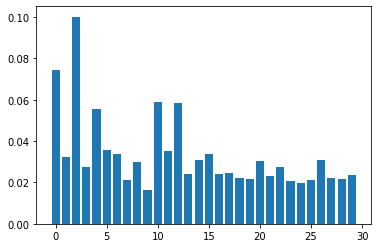

In [11]:
#shows features that contirbutes the most
features = rf_model.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [12]:
#select form features that contributes the most
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf_model)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [14]:
lr_model_sel = LogisticRegression()
lr_model_sel.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_model_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_model_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7237067361369557
Testing Score: 0.7157847733869167


In [15]:
rf_model_sel = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_model_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_model_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9938221064384072
Testing Score: 0.8749720919848181


In [16]:
from joblib import dump, load
dump(rf_model, 'Model/RF_opt_Electr&Exper.joblib') 

['Model/RF_opt_Electr&Exper.joblib']